In [482]:
from __future__ import print_function
import pandas as pd
import pickle
import numpy as np
import glob, os, re
from pylab import *

from sklearn.preprocessing  import  StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.decomposition import PCA, KernelPCA

from sklearn.metrics import roc_curve, auc,  classification_report, make_scorer, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import  LogisticRegression  
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

import matplotlib.style as ms
ms.use('seaborn-muted')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D


path = '/Volumes/ext200/Dropbox/metis/project3_mcnulty/pickle/'

In [483]:
def plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=0,title="Checking Train-Test Split"):
    x_plot = []
    x_plot_test = []
    for j in X_train:
        x_plot.append(j[feature_num])
    for j in X_test:
        x_plot_test.append(j[feature_num])

    #plt.figure(figsize=(8,6))
    plt.scatter(x_plot, y_train, c='b')
    plt.scatter(x_plot_test, y_test, c='r')
    plt.xlabel("Feature " + str(feature_num),fontsize=16)
    plt.ylabel("Cat    Dog",fontsize=16);
    plt.title(title,fontsize=16);

# open pickle file of data frame and separate into X and y

In [484]:
with open(path + "both.pkl", 'rb') as picklefile: #both_3fft
    df = pickle.load(picklefile)

#targets# . cat = 0;   dog = 1
y = df['y_val'].values

#features
X1 = df
del X1['y_val']
X = X1

# plot some histograms of the data to see patterns  and get an idea of the size/shape of raw data. 

# Zach, i'm not sure this is all that informative here, b/c the column that each number belongs to, is the freq vin that it came from, and that info is not retained in these histograms.  although it's interesting that the magnitudes seem to take on a certain shape for each class. 

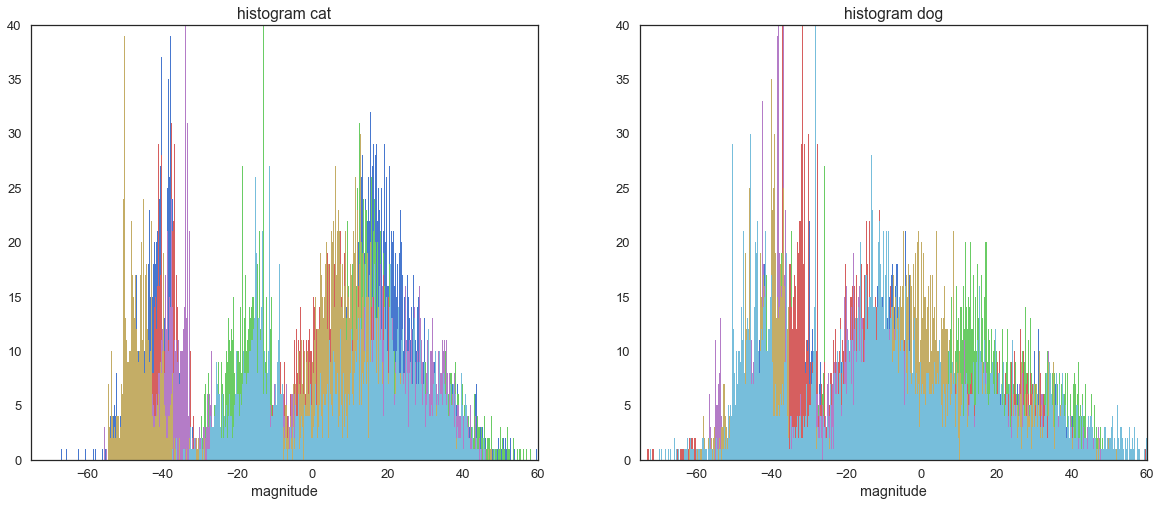

In [469]:
fig0 = plt.figure(figsize=(20,8));

plt.subplot(1,2,1);

plt.title('histogram cat');
plt.axis([-75, 60, 0, 40]);
plt.xlabel('magnitude')

# the row represents one sample
plt.hist(X.iloc[0,:],bins=2000);
plt.hist(X.iloc[1,:],bins=2000);
plt.hist(X.iloc[15,:],bins=2000);
plt.hist(X.iloc[20,:],bins=2000);
plt.hist(X.iloc[120,:],bins=2000);
plt.hist(X.iloc[110,:],bins=2000);


plt.subplot(1,2,2);

plt.title('histogram dog');
plt.axis([-75, 60, 0, 40]);
plt.xlabel('magnitude')

# the row represents one sample
plt.hist(X.iloc[200,:],bins=2000);
plt.hist(X.iloc[210,:],bins=2000);
plt.hist(X.iloc[215,:],bins=2000);
plt.hist(X.iloc[220,:],bins=2000);
plt.hist(X.iloc[250,:],bins=2000);
plt.hist(X.iloc[230,:],bins=2000);


# need to shuffle data so that train/test split isn't taking all from one category
# 147 cat files    108 dog files =  unbalanced data, so need to do stratified shuffle split method

In [485]:
rs = StratifiedShuffleSplit(n_splits=1, random_state=24, test_size=0.25, train_size=None)
for train_index, test_index in rs.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 51   2 126 114 116  31  42  66 110  83 107  39  76 176 166   5 225 165
 168 197 188 113 213  68  71  48  49 203  90 145 120  96 135  61  32 217
   1 201 105  98 155 202  45 241 222 239  50 206  84 124 133  58 236  75
 138 161 177  69   9  56 214  92   7 204  25 198 157 152  72 246 223  17
  43  99  24 187 111 173 186  22 162 210  37  36  80  85 212  86 182 103
  62 127 224  79 172  13  93 132  91 226  94  77  38 179 102 158  54 193
 237 153 143  59  21 156  20 160 248  57 171 242 253 195  16 106 190  44
 170 134 147 181 180  95 191  11  40 174  53  10 229 112 137 208 233   8
 207  88 101 227 108 211 183  63 117 159 205  14  23 122 189 199  29 234
 164  78 216  34 104 109  26  67 215 220  41 247 231 146 240 219 150 184
 136 249 151  15  19 252 121  52   0  30 140] TEST: [ 47 123 131 196 245 167   4 129 119 125 142  82 230  97  73 100  35  28
 115 244  64  60  18 185 175 130   6 118 141 238 200 243  65  33 169 209
 232  87 148 228 221 154 218  70  55  74 235 144 149 194 139 163 

# Use index to create test and train sets

In [486]:
X_traina = X.iloc[train_index,:]
X_testa =  X.iloc[test_index,:]

y_train = y[train_index]
y_test = y[test_index]

X_train1 = np.array(X_traina)
X_test1 = np.array(X_testa)

# STANDARD SCALE to normalize (very important for PCA) for the test set and train set separately, so you are not peeking at your data. 

In [487]:
stdScale = StandardScaler()

X_train = stdScale.fit_transform(X_train1)

X_test = stdScale.transform(X_test1)

# visualize the first few comonents of the test-train-split to look at distribution of data & check that it was evenly split among classes

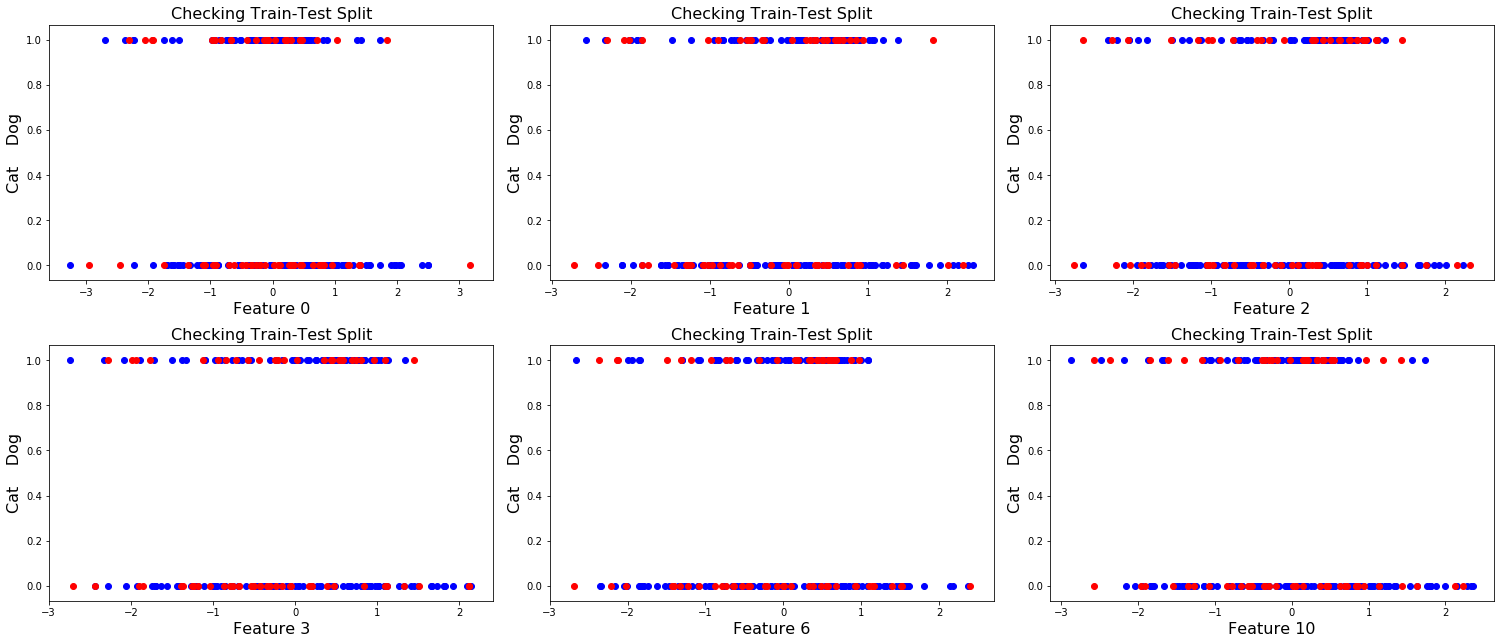

In [126]:
fig0 = plt.figure(figsize=(21,13));

plt.subplot(3,3,1);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=0)

plt.subplot(3,3,2);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=1)

plt.subplot(3,3,3);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=2)

plt.subplot(3,3,4);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=3)

plt.subplot(3,3,5);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=6)

plt.subplot(3,3,6);
plot_single_feature_vs_label(X_train, X_test, y_train, y_test, feature_num=10)
plt.tight_layout()

In [488]:
def plot_pca(X,y,titlestr,v1=0,v2=0):
    """ pass in the X from pca.transform ,and the corresponding y values and a string to add to the title
    plots the first three PCA directions/eigenvectors with target values as the color
    ___________________________________________________________________"""
 
    fig = plt.figure(1, figsize=(13, 10))
    ax = Axes3D(fig, elev=-150, azim=110)

    # plot transformed values (the three features that we have decomposed to) , colors correspond to target values
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
               cmap=plt.cm.cool, edgecolor='k', s=50)
    ax.set_title("First three PCA directions " + titlestr, fontsize=16)
    ax.set_xlabel("1st eigenvector",fontsize=16)
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel("2nd eigenvector",fontsize=16)
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel("3rd eigenvector",fontsize=16)
    ax.w_zaxis.set_ticklabels([])
    ax.view_init(v1,v2)

# initialize PCA with a large number of components

In [474]:
# initialize model
pca = PCA(n_components=75)
# fit to training data
pca.fit(X_train)
# transform
X_pca = pca.transform(X_train)

# plot the cumulative sum of the explained variance against the component number to see how many it takes to explain most of the variance. This is what we will use going forward as the number of components

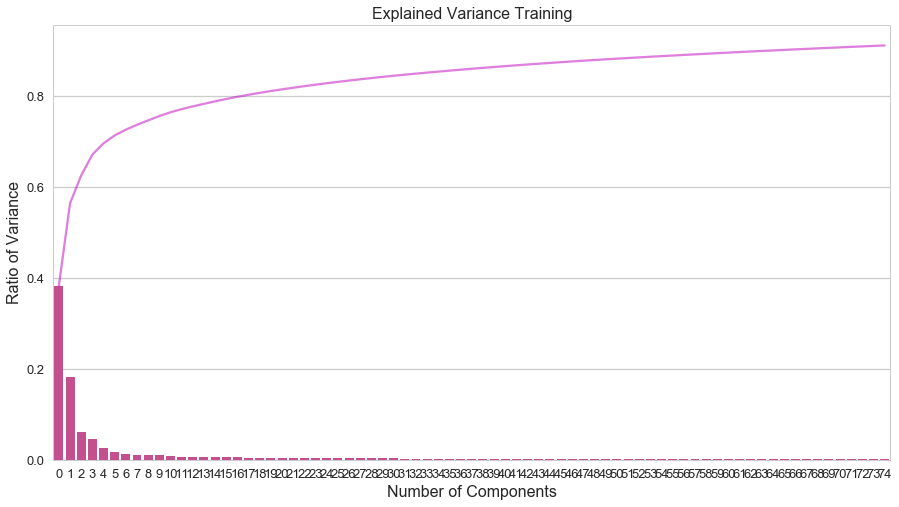

In [429]:
#sns.set()
sns.set_style('whitegrid')
sns.set_context("talk")
fig0 = plt.figure(figsize=(15,8));
sns.barplot(y=pca.explained_variance_ratio_, x=np.arange(75), data=None,color="deeppink", saturation=.5)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'m',alpha=.5)
plt.xlabel('Number of Components', fontsize=16)
plt.ylabel('Ratio of Variance', fontsize=16);
plt.title('Explained Variance Training', fontsize=16)
#plt.grid()  fig1.text(0.80, .8, 'p = {:1f}'.format(pdr[1]), fontsize=12);

# reinitialize PCA model with the number of comonents that explain most of the variance, 4 components

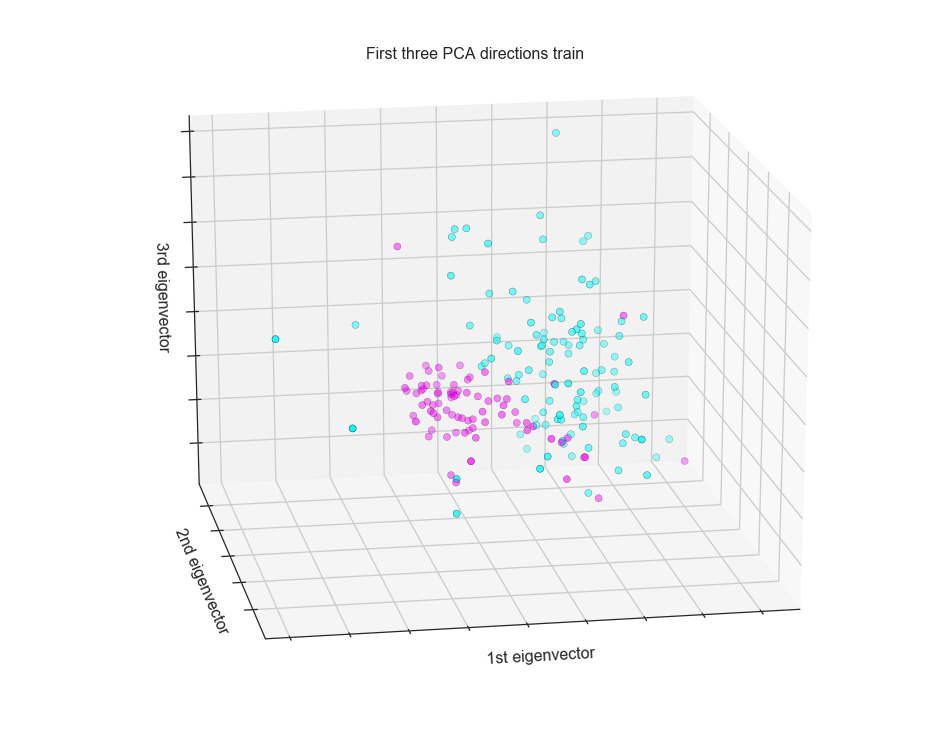

In [489]:
pca = PCA(n_components=6)
# fit to training data
pca.fit(X_train)
# transform
X_train_pca = pca.transform(X_train)

plot_pca(X_train_pca,y_train,'train',20,80)

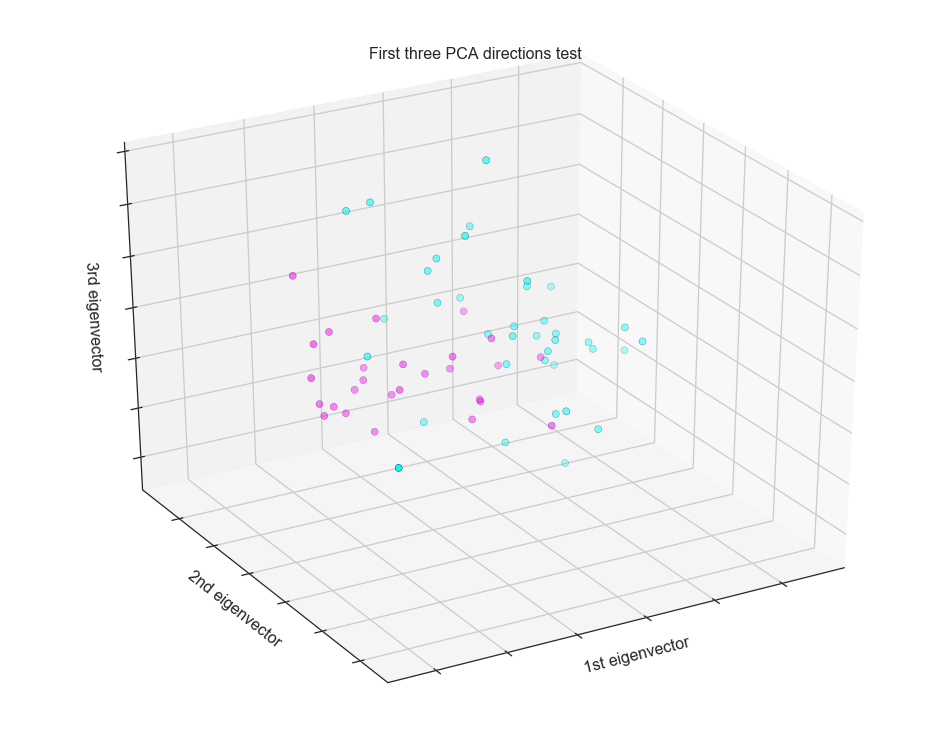

In [490]:
X_test_pca = pca.transform(X_test)
plot_pca(X_test_pca,y_test,'test',30,60)

# kernel pca, does not appear to be separating points, even with lower gamma values

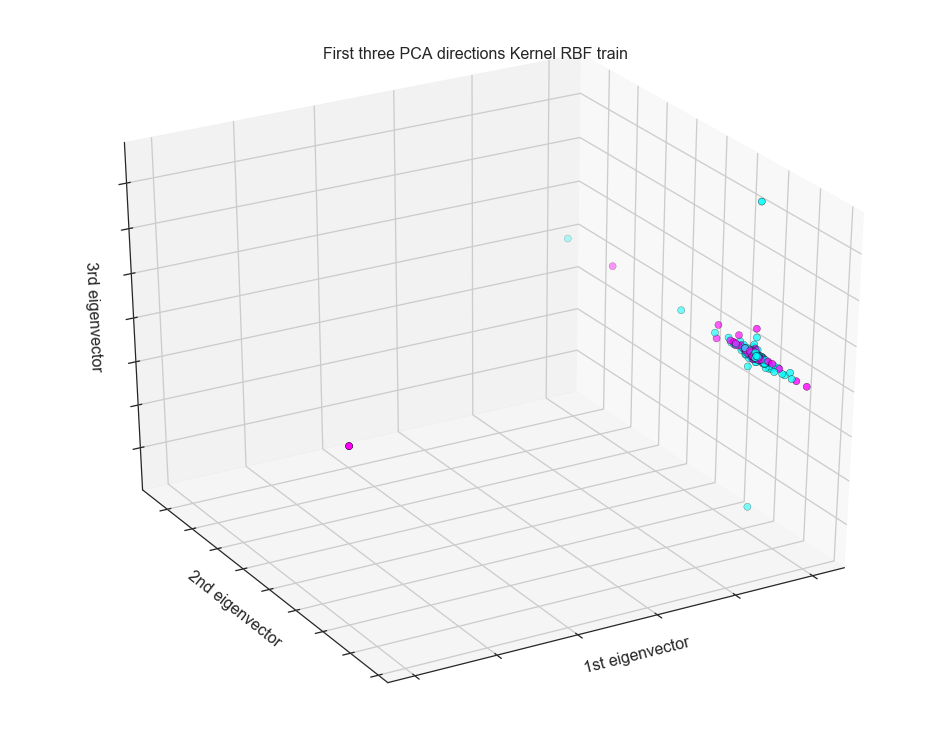

In [491]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=3)
X_kpca = kpca.fit(X_train)
X_back = kpca.transform(X_train)
plot_pca(X_back,y_train,'Kernel RBF train',30,60)

# function to easily run models and output the scores

In [492]:
def modeling(model,X_train,X_test,y_train,y_test):
    """ pass through the type of model and the variables to train and predict, yeilds accuracy score"""
    
    model_ = model

    model_.fit(X_train, y_train)
    y_pred = model_.predict(X_test)
    
    score = round(model_.score(X_test,y_test),6)
    print("Accuracy Score: \n", "%.3f"%score)
    print(classification_report(y_test, y_pred, 
                                target_names=["cat","dog"]))

# fit a dummy CLASSifier that always returns cat & print accuracy
 147 cat files    108dog files 

In [496]:
modeling(DummyClassifier(strategy='constant', constant=0),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.578
             precision    recall  f1-score   support

        cat       0.58      1.00      0.73        37
        dog       0.00      0.00      0.00        27

avg / total       0.33      0.58      0.42        64



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# fit a dummy CLASSifier that always returns dog & print accuracy
147 cat files 108dog files

In [497]:
modeling(DummyClassifier(strategy='constant', constant=1),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.422
             precision    recall  f1-score   support

        cat       0.00      0.00      0.00        37
        dog       0.42      1.00      0.59        27

avg / total       0.18      0.42      0.25        64



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Run a KNN model with varying k-values and plot to see which gives highest accuracy

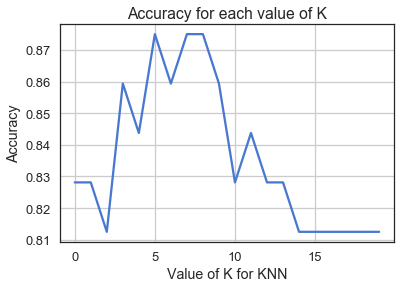

In [493]:
acc = []
k_range = list(range(1, 21))
for ks in k_range:
    knn = KNeighborsClassifier(n_neighbors=ks)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(np.arange(20),acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy for each value of K')
plt.grid()

# the plot above shows us that the K-value that gives us the highest accuracy is 5, so that is what we use for the KNN model

In [498]:
modeling(KNeighborsClassifier(n_neighbors=5),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.844
             precision    recall  f1-score   support

        cat       0.85      0.89      0.87        37
        dog       0.84      0.78      0.81        27

avg / total       0.84      0.84      0.84        64



In [499]:
modeling(GaussianNB(),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.859
             precision    recall  f1-score   support

        cat       0.85      0.92      0.88        37
        dog       0.88      0.78      0.82        27

avg / total       0.86      0.86      0.86        64



In [502]:
modeling(GaussianNB(),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.859
             precision    recall  f1-score   support

        cat       0.85      0.92      0.88        37
        dog       0.88      0.78      0.82        27

avg / total       0.86      0.86      0.86        64



In [503]:
modeling(LogisticRegression(),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.844
             precision    recall  f1-score   support

        cat       0.85      0.89      0.87        37
        dog       0.84      0.78      0.81        27

avg / total       0.84      0.84      0.84        64



In [505]:
modeling(SVC(kernel="poly"),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.812
             precision    recall  f1-score   support

        cat       0.86      0.81      0.83        37
        dog       0.76      0.81      0.79        27

avg / total       0.82      0.81      0.81        64



In [506]:
modeling(DecisionTreeClassifier(),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.750
             precision    recall  f1-score   support

        cat       0.77      0.81      0.79        37
        dog       0.72      0.67      0.69        27

avg / total       0.75      0.75      0.75        64



In [507]:
modeling(RandomForestClassifier(n_estimators=2000),X_train_pca,X_test_pca,y_train,y_test)

Accuracy Score: 
 0.797
             precision    recall  f1-score   support

        cat       0.77      0.92      0.84        37
        dog       0.85      0.63      0.72        27

avg / total       0.81      0.80      0.79        64



# Plot the ROC curve for all models

In [508]:
def roc_plot(X_train, X_test, y_train, y_test):
    
    
    def fit_roc(model, X_train, X_test, y_train, y_test):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
        score = round(model.score(X_test,y_test),2)
        fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred_proba[:,1])
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc,score

    sns.set_style('white')
    sns.set_context("talk")
    fig0 = plt.figure(figsize=(15,8));
    plt.plot([0, 1], [0, 1], lw=2, color = 'black' , linestyle='--')
    
    fpr1, tpr1, roc_auc1,score1 = fit_roc(GaussianNB(), X_train, X_test, y_train, y_test)
    plt.plot(fpr1, tpr1, lw=2, color = 'brown', label='Gauss NB area=%0.2f,accuracy={}'.format(score1) % roc_auc1)
    
    fpr2, tpr2, roc_auc2, score2 = fit_roc(LogisticRegression(), X_train, X_test, y_train, y_test)
    plt.plot(fpr2, tpr2, lw=2, color = 'darkviolet', label='Log Reg area=%0.2f,accuracy={}'.format(score2) % roc_auc2)
    
    fpr5, tpr5, roc_auc5,score5 = fit_roc(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test)
    plt.plot(fpr5, tpr5, lw=2, color = 'darkgray', label='KNN area=%0.2f,accuracy={}'.format(score5)  % roc_auc5)
    
    fpr3, tpr3, roc_auc3,score3 = fit_roc(RandomForestClassifier(n_estimators=2000), X_train, X_test, y_train, y_test)
    plt.plot(fpr3, tpr3, lw=2, color = 'green', label='Rand Forest area=%0.2f,accuracy={}'.format(score3) % roc_auc3)
    
    fpr4, tpr4, roc_auc4,score4 = fit_roc(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)
    plt.plot(fpr4, tpr4, lw=2, color = 'royalblue',label='Decision Tree area=%0.2f,accuracy={}'.format(score4)% roc_auc4)
    
    fpr6, tpr6, roc_auc6,score6 = fit_roc(DummyClassifier(strategy='constant', constant=0), X_train, X_test, y_train, y_test)
    plt.plot(fpr6, tpr6, lw=2, color = 'black',label='Dummy area=%0.2f,accuracy={}'.format(score6)% roc_auc6)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('ROC {}'.format(model), fontsize=12)
    plt.title('ROC All Models', fontsize=12)
    plt.legend(loc="lower right")
    plt.show()
    

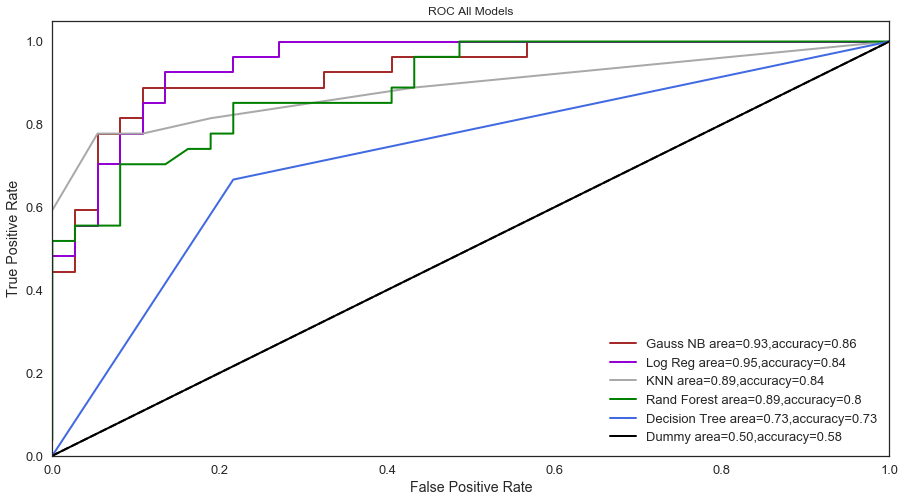

In [509]:
roc_plot(X_train_pca,X_test_pca,y_train,y_test)


In [123]:
#save the test/train sets
with open(path + 'X_train.pkl', 'wb') as picklefile:
        pickle.dump(X_traina, picklefile)    
        
with open(path + 'X_test.pkl', 'wb') as picklefile:
        pickle.dump(X_testa, picklefile)    
        
with open(path + 'y_train.pkl', 'wb') as picklefile:
        pickle.dump(y_train, picklefile)  
        
with open(path + 'y_test.pkl', 'wb') as picklefile:
        pickle.dump(y_test, picklefile)    

with open(path + 'test_index.pkl', 'wb') as picklefile:
        pickle.dump(test_index, picklefile)    
        
with open(path + 'train_index.pkl', 'wb') as picklefile:
        pickle.dump(train_index, picklefile)    